In [113]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
train_data=pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")

In [115]:
train_data.shape,test_data.shape

((8523, 12), (5681, 11))

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
546,FDI27,8.710,Regular,0.046058,Dairy,43.8744,OUT049,1999,Medium,Tier 1,Supermarket Type1,633.8416
5551,FDD14,20.700,Low Fat,0.170500,Canned,184.1266,OUT018,2009,Medium,Tier 3,Supermarket Type2,1659.8394
8213,FDW33,9.395,Low Fat,0.099681,Snack Foods,106.4280,OUT017,2007,NaN,Tier 2,Supermarket Type1,1917.5040
1730,FDY28,7.470,Regular,0.153012,Frozen Foods,215.2218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3419.5488
5570,FDS36,8.380,Regular,0.046848,Baking Goods,110.5570,OUT013,1987,High,Tier 3,Supermarket Type1,3844.9950


In [116]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
temp_category_data=train_data[["Item_Identifier", "Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]]

In [8]:
col=[]
for var in temp_category_data:
    train_col_unique=temp_category_data[var].unique()
    col.append(train_col_unique)
    

In [9]:
col

[array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
       dtype=object),
 array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object),
 array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
        'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object),
 array(['Medium', nan, 'High', 'Small'], dtype=object),
 array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object),
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object)]

In [10]:
cols=[]
for var in temp_category_data:
    train_col_unique=temp_category_data[var].nunique()
    cols.append(train_col_unique)

In [11]:
cols

[1559, 5, 16, 10, 3, 3, 4]

In [13]:
for var in temp_category_data.columns:
    data_count=temp_category_data[var].value_counts()
    print("column name is:",var, "and Item values are:\n",data_count)

column name is: Item_Identifier and Item values are:
 FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
column name is: Item_Fat_Content and Item values are:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
column name is: Item_Type and Item values are:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
column name is: Outlet_Identifier 

In [14]:
train_data.iloc[:,0].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [113]:
#train_data["Outlet_Establishment_Year"]=train_data["Outlet_Establishment_Year"].astype(float)

In [15]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [16]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
train_data.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [18]:
cols=[var for var in train_data.columns if train_data[var].isnull().mean()<0.05 and train_data[var].isnull().mean() >0]

In [19]:
cols

[]

In [20]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
train_data.duplicated().sum()

0

In [22]:
train_data.corr()['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [23]:
temp_category_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [24]:
temp_numerical_data=train_data[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]]

# categorical univariate analysis

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

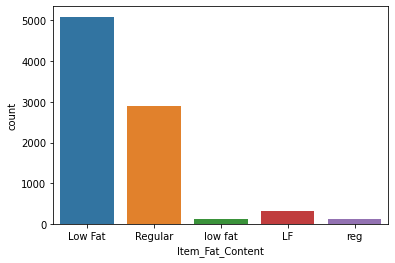

In [104]:
sns.countplot(train_data["Item_Fat_Content"])

<AxesSubplot:>

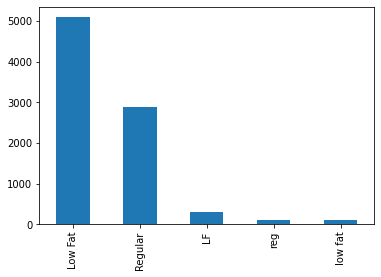

In [105]:
train_data["Item_Fat_Content"].value_counts().plot(kind="bar") #incosistent data nedds to use fuzzzywuzzy 

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

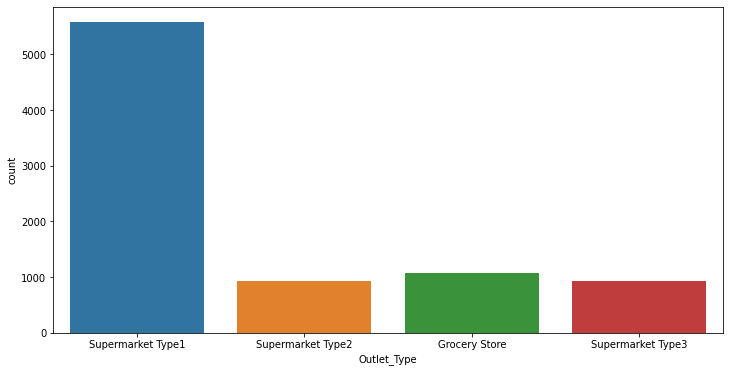

In [116]:
fig=plt.figure(figsize=(12,6))
sns.countplot(train_data["Outlet_Type"])

<AxesSubplot:>

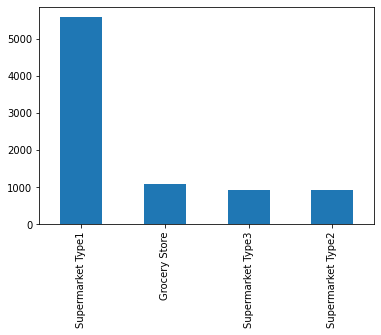

In [118]:
train_data["Outlet_Type"].value_counts().plot(kind="bar")

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

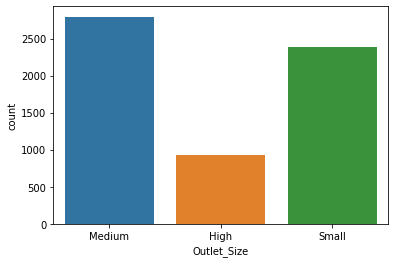

In [107]:
sns.countplot(train_data["Outlet_Size"])

<AxesSubplot:>

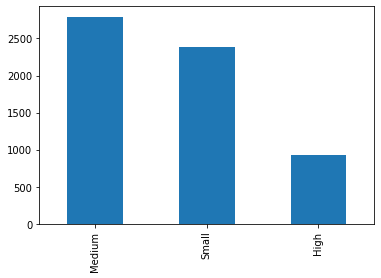

In [119]:
train_data["Outlet_Size"].value_counts().plot(kind="bar")

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

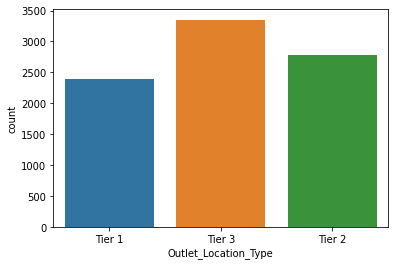

In [108]:
sns.countplot(train_data["Outlet_Location_Type"])

<AxesSubplot:>

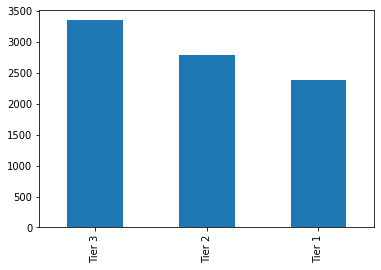

In [120]:
train_data["Outlet_Location_Type"].value_counts().plot(kind="bar")

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

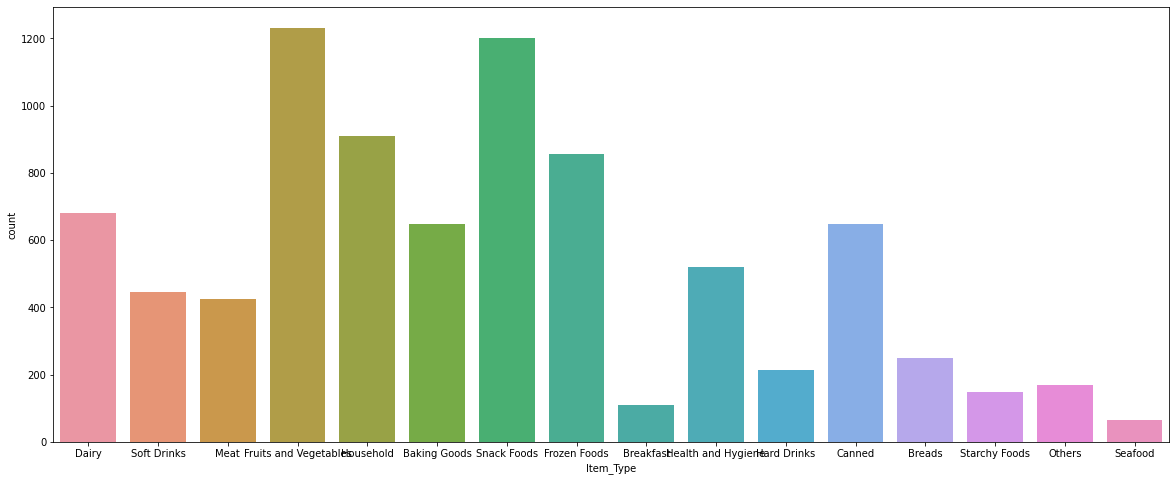

In [109]:
fig=plt.figure(figsize=(20, 8))
sns.countplot(train_data["Item_Type"])

<AxesSubplot:>

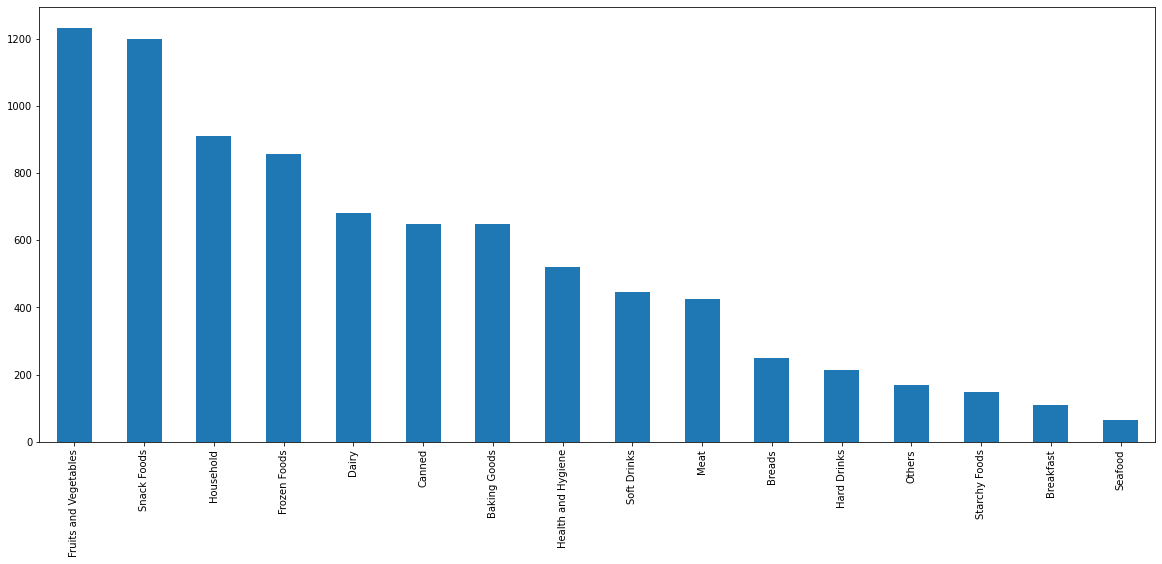

In [121]:
fig=plt.figure(figsize=(20, 8))
train_data["Item_Type"].value_counts().plot(kind="bar")
#what should i do 1)bread to sea food one category 2) others to sea food one category

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

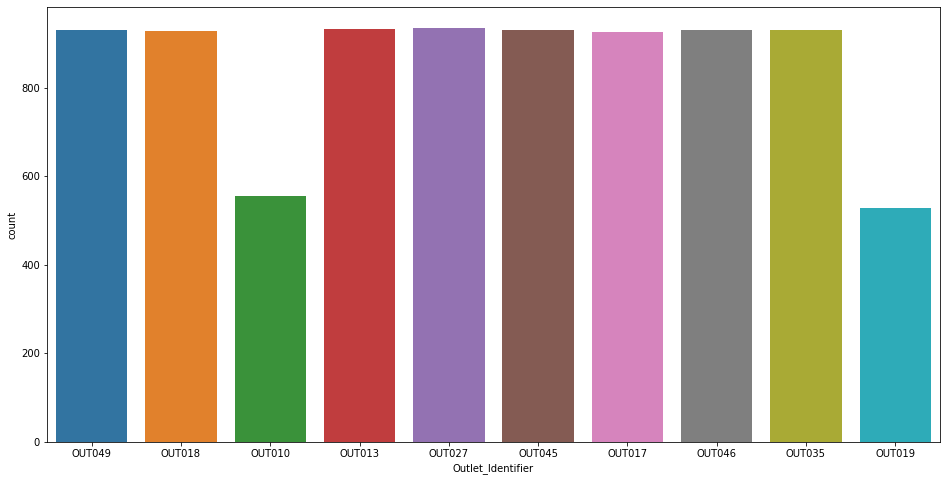

In [117]:
fig=plt.figure(figsize=(16,8))
sns.countplot(train_data["Outlet_Identifier"])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

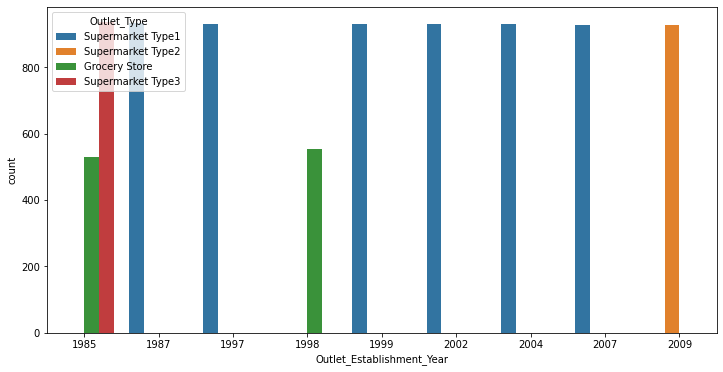

In [110]:
fig=plt.figure(figsize=(12,6))
sns.countplot(train_data['Outlet_Establishment_Year'],hue=train_data["Outlet_Type"])

In [109]:
temp_category_data.columns,temp_numerical_data.columns

(Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
       dtype='object'))

<AxesSubplot:ylabel='Item_Fat_Content'>

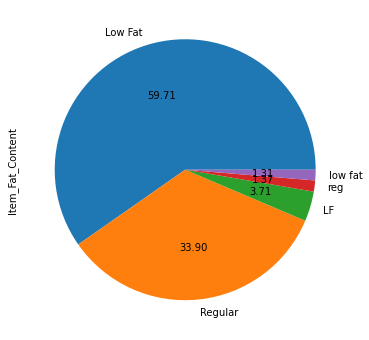

In [127]:
fig=plt.figure(figsize=(12,6))
train_data["Item_Fat_Content"].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='Item_Type'>

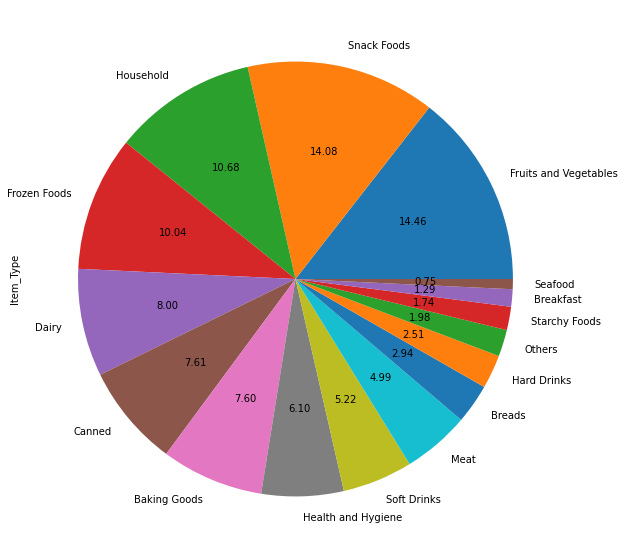

In [129]:
fig=plt.figure(figsize=(16,10))
train_data['Item_Type'].value_counts().plot(kind="pie",autopct="%.2f")
#i can do 5.22 and 4.99 one category, 2)2.95-2.51 another category 3)1.98-.75 another category
#2.94-2.55 2)1.98-.75 another category
#2.94-.75 one category

<AxesSubplot:ylabel='Outlet_Identifier'>

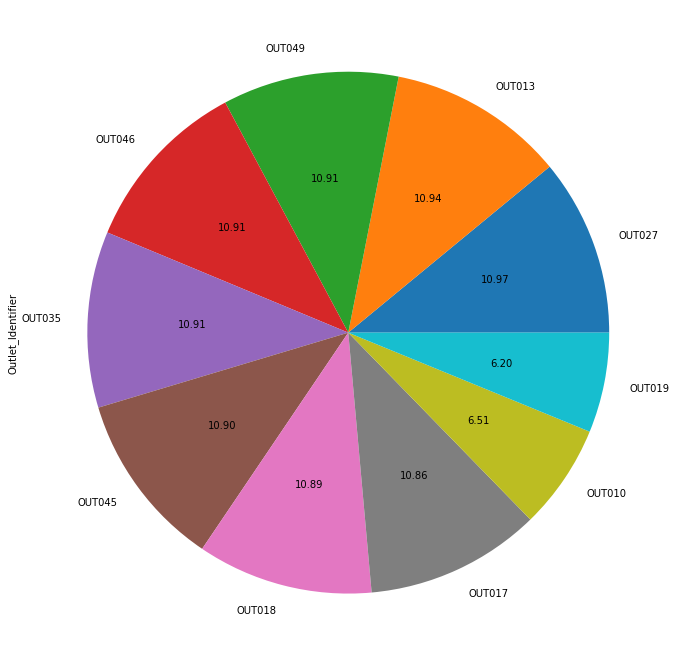

In [130]:
fig=plt.figure(figsize=(16,12))
train_data['Outlet_Identifier'].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='Outlet_Size'>

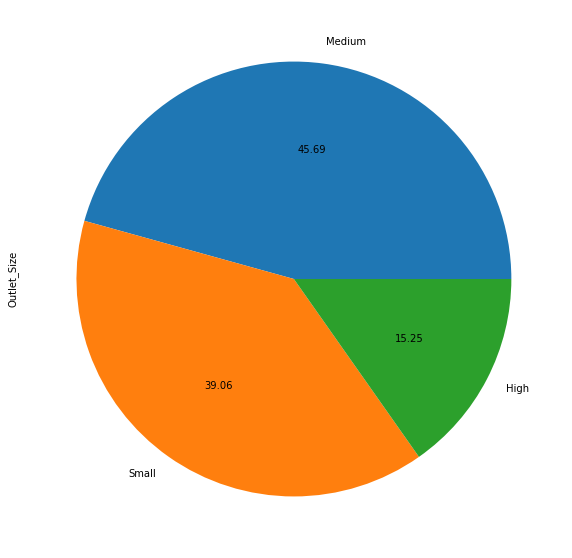

In [131]:
fig=plt.figure(figsize=(16,10))
train_data['Outlet_Size'].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='Outlet_Location_Type'>

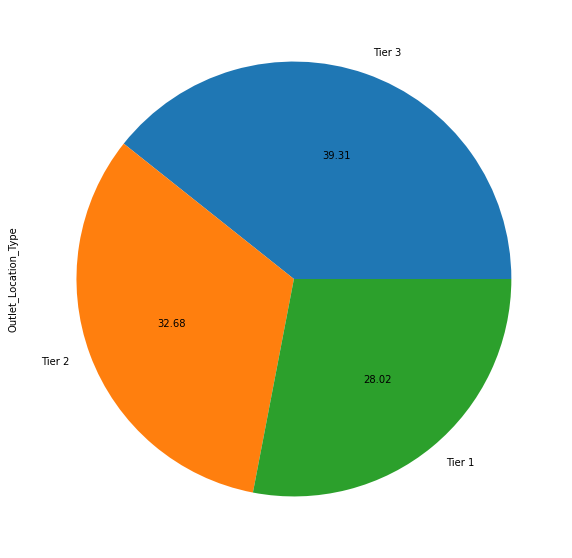

In [132]:
fig=plt.figure(figsize=(16,10))
train_data['Outlet_Location_Type'].value_counts().plot(kind="pie",autopct="%.2f")

<AxesSubplot:ylabel='Outlet_Type'>

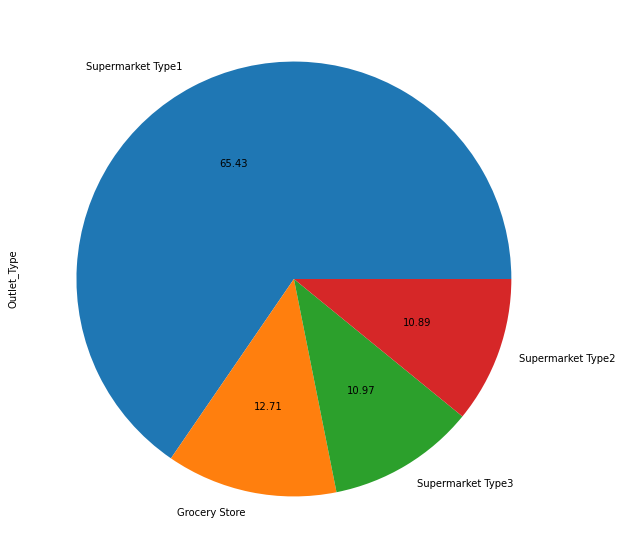

In [133]:
fig=plt.figure(figsize=(16,10))
train_data['Outlet_Type'].value_counts().plot(kind="pie",autopct="%.2f")

# numerical univariate analysis visualization

In [170]:
temp_numerical_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [163]:
temp_numerical_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

(array([ 67., 148., 268., 275., 254., 341., 278., 317., 270., 246., 239.,
        179., 293., 265., 221., 242., 206., 181., 239., 287., 229., 274.,
        170., 291., 215., 243., 219., 229., 280.,  94.]),
 array([ 4.555     ,  5.11483333,  5.67466667,  6.2345    ,  6.79433333,
         7.35416667,  7.914     ,  8.47383333,  9.03366667,  9.5935    ,
        10.15333333, 10.71316667, 11.273     , 11.83283333, 12.39266667,
        12.9525    , 13.51233333, 14.07216667, 14.632     , 15.19183333,
        15.75166667, 16.3115    , 16.87133333, 17.43116667, 17.991     ,
        18.55083333, 19.11066667, 19.6705    , 20.23033333, 20.79016667,
        21.35      ]),
 <BarContainer object of 30 artists>)

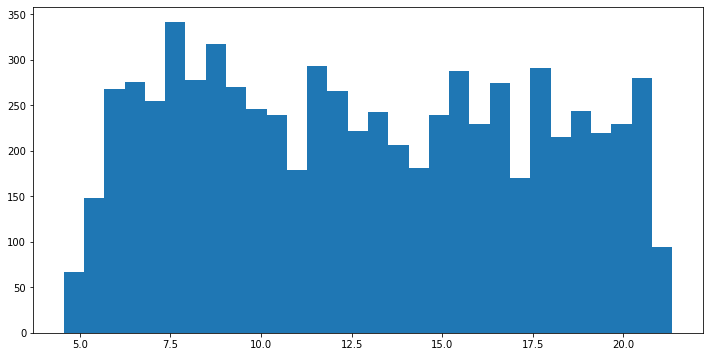

In [167]:
fig=plt.figure(figsize=(12,6))
plt.hist(train_data['Item_Weight'],bins=30)

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <BarContainer object of 10 artists>)

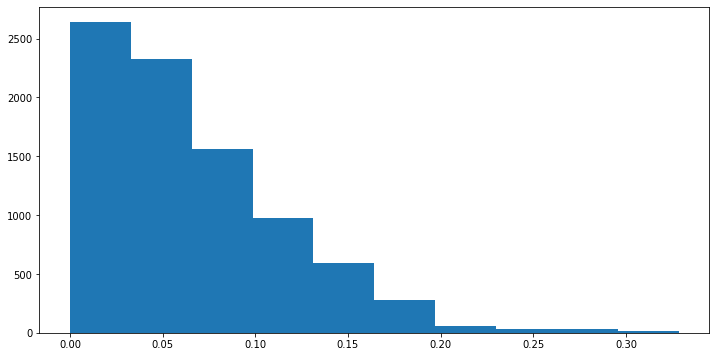

In [169]:
fig=plt.figure(figsize=(12,6))
plt.hist(train_data['Item_Visibility'])

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

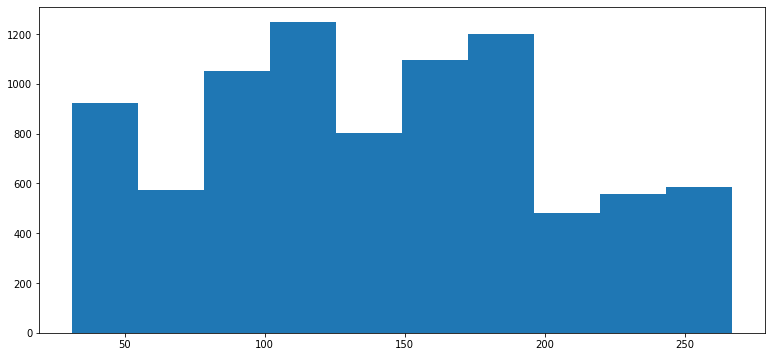

In [171]:
fig=plt.figure(figsize=(13,6))
plt.hist(train_data['Item_MRP'])

(array([2395.,    0.,    0.,    0.,    0., 2415.,    0., 1859.,    0.,
        1854.]),
 array([1985. , 1987.4, 1989.8, 1992.2, 1994.6, 1997. , 1999.4, 2001.8,
        2004.2, 2006.6, 2009. ]),
 <BarContainer object of 10 artists>)

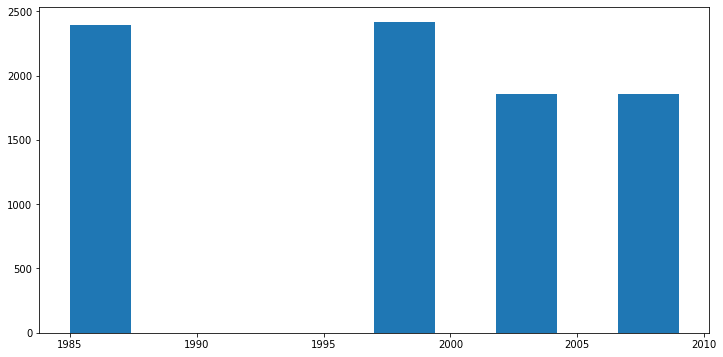

In [172]:
fig=plt.figure(figsize=(12,6))
plt.hist(train_data['Outlet_Establishment_Year'])

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

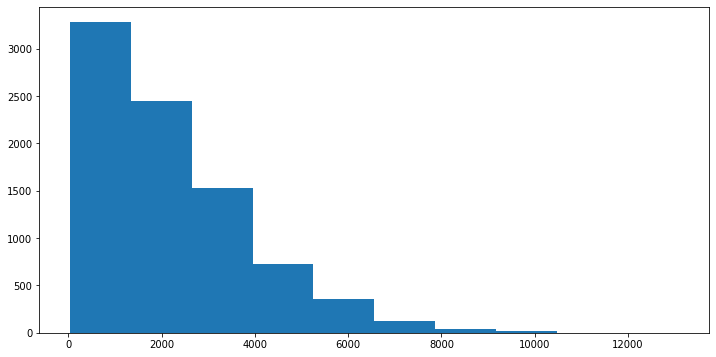

In [173]:
fig=plt.figure(figsize=(12,6))
plt.hist(train_data['Item_Outlet_Sales'])

# distplot

In [25]:
temp_numerical_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

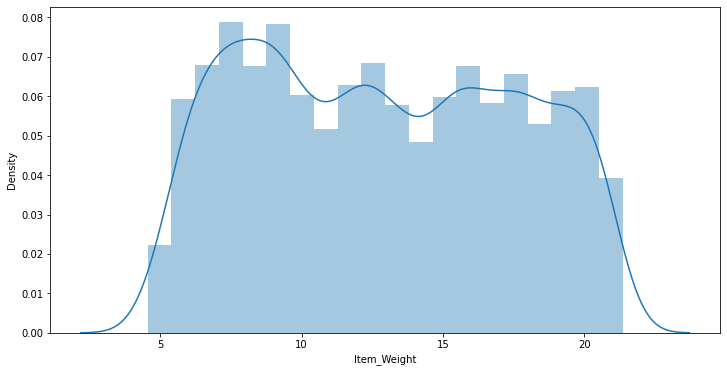

In [28]:
fig=plt.figure(figsize=(12, 6))
sns.distplot(train_data['Item_Weight'])

In [36]:
train_data["Item_Weight"].skew()

0.0824262091221237

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

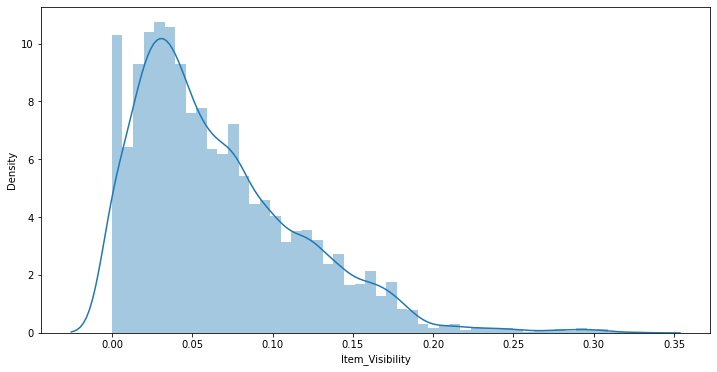

In [29]:
fig=plt.figure(figsize=(12, 6))
sns.distplot(train_data['Item_Visibility'])

In [35]:
train_data['Item_Visibility'].skew()

1.1670905496918396

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

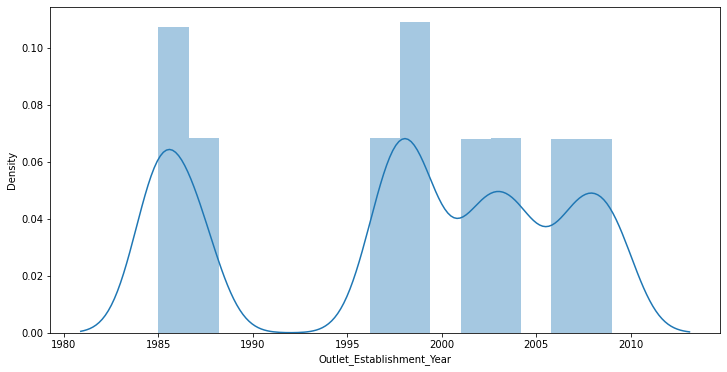

In [30]:
fig=plt.figure(figsize=(12, 6))
sns.distplot(train_data['Outlet_Establishment_Year'])

In [37]:
train_data['Outlet_Establishment_Year'].skew()

-0.39664078591550556

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

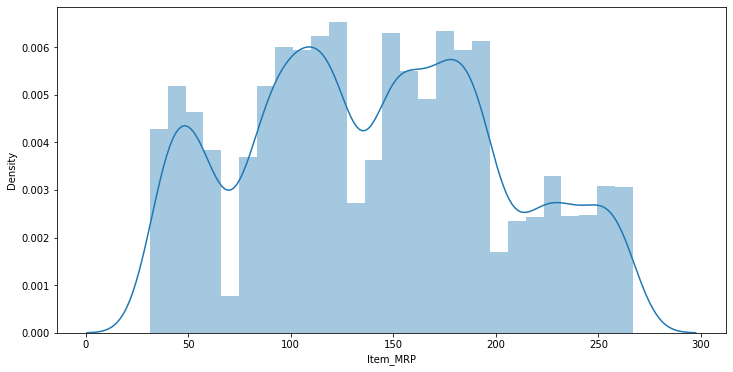

In [31]:
fig=plt.figure(figsize=(12, 6))
sns.distplot(train_data['Item_MRP'])

In [32]:
train_data["Item_MRP"].skew()

0.1272022683110526

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

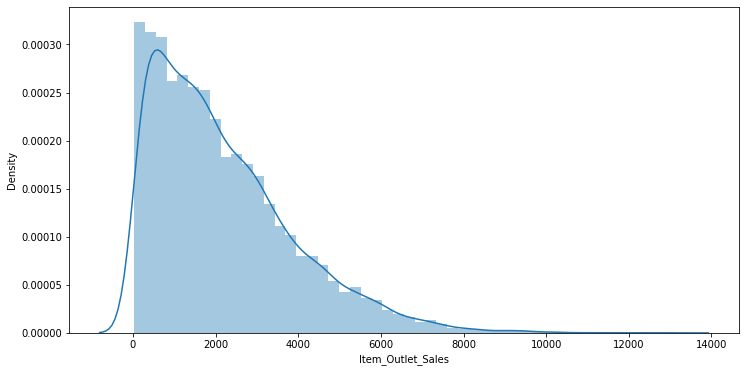

In [99]:
fig=plt.figure(figsize=(12, 6))
sns.distplot(train_data['Item_Outlet_Sales'])

In [100]:
train_data["Item_Outlet_Sales"].skew()

1.1775306028542796

In [ ]:
#'Outlet_Establishment_Year' left skewness
#'Item_Visibility' right skewness
#Item_Outlet_Sales right skewed

# Boxplot

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

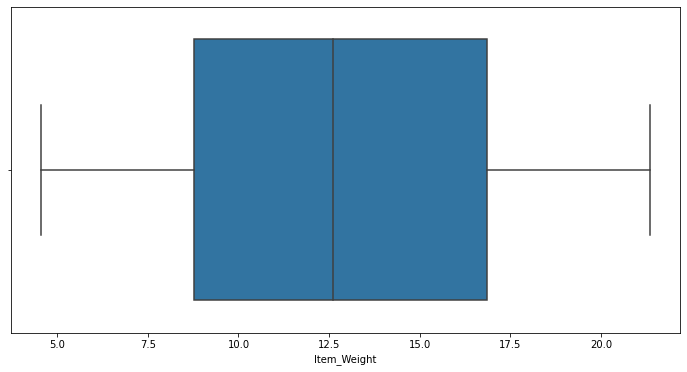

In [39]:
fig=plt.figure(figsize=(12, 6))
sns.boxplot(train_data['Item_Weight'])


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

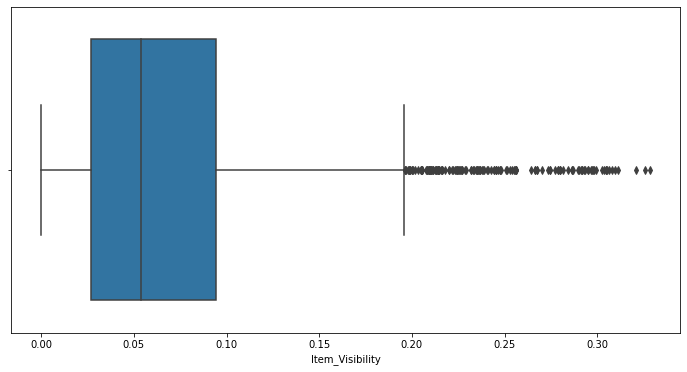

In [40]:
fig=plt.figure(figsize=(12, 6))
sns.boxplot(train_data['Item_Visibility'])


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

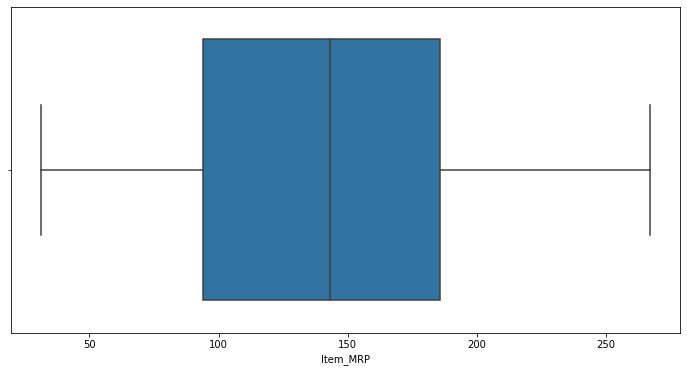

In [41]:
fig=plt.figure(figsize=(12, 6))
sns.boxplot(train_data['Item_MRP'])


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year'>

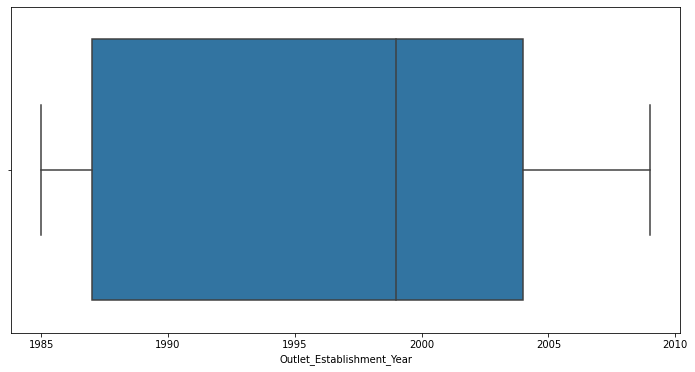

In [42]:
fig=plt.figure(figsize=(12, 6))
sns.boxplot(train_data['Outlet_Establishment_Year'])


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

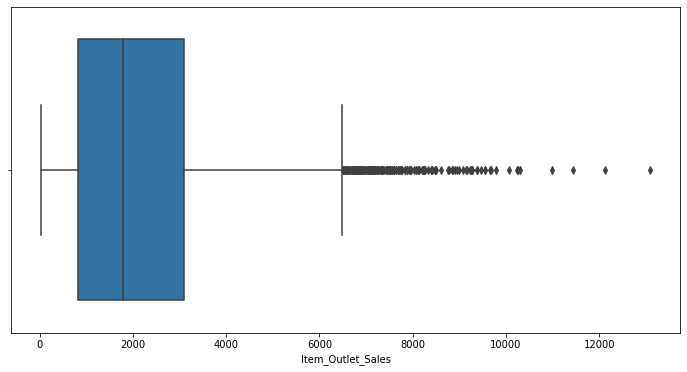

In [43]:
fig=plt.figure(figsize=(12, 6))
sns.boxplot(train_data['Item_Outlet_Sales'])


In [ ]:
#'Item_Outlet_Sales' has outliers 
# 'Item_Visibility' has outliers

# bivariate analysis

# scatterplot(numerica-numerical)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

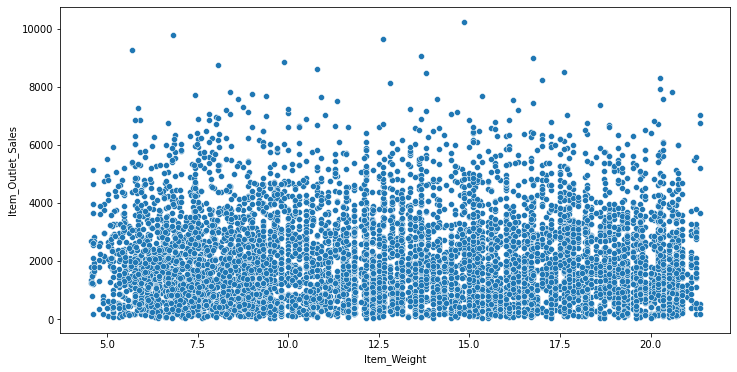

In [101]:
fig=plt.figure(figsize=(12,6))
sns.scatterplot(train_data['Item_Weight'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

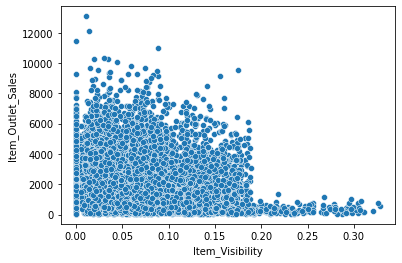

In [52]:
sns.scatterplot(train_data['Item_Visibility'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

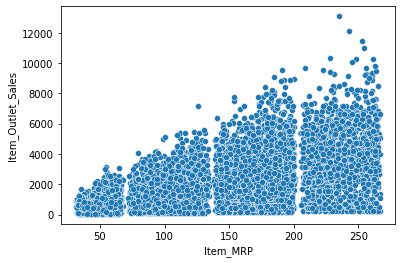

In [50]:
sns.scatterplot(train_data['Item_MRP'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

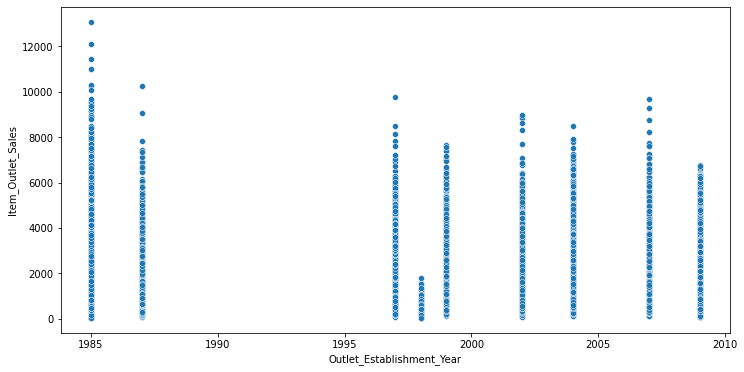

In [66]:
fig=plt.figure(figsize=(12, 6))
sns.scatterplot(train_data['Outlet_Establishment_Year'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

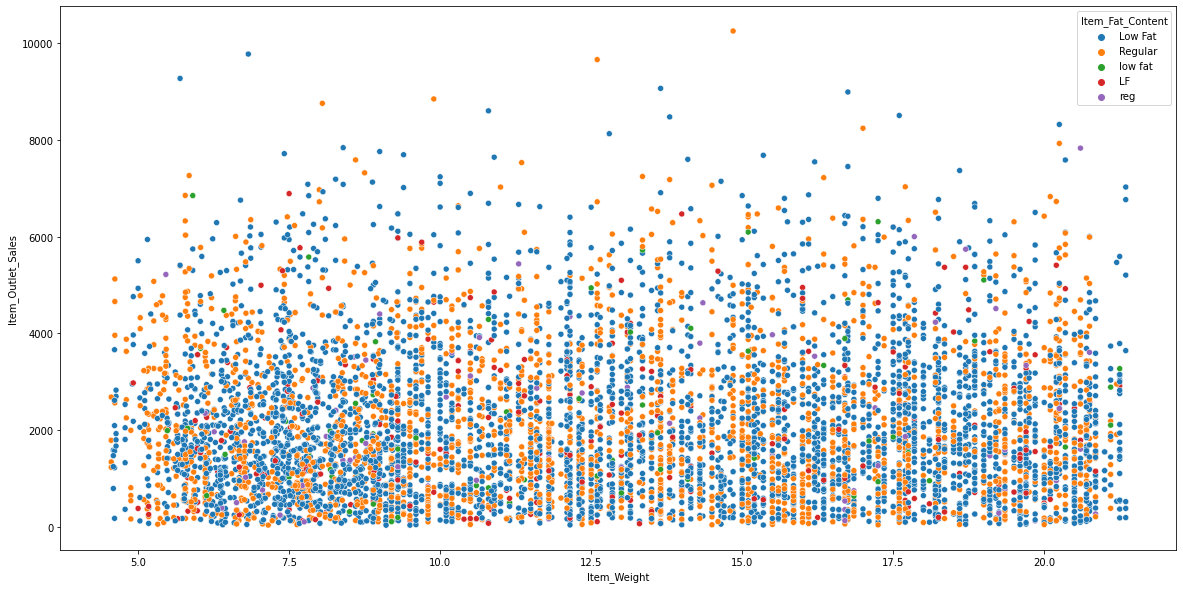

In [64]:
fig=plt.figure(figsize=(20,10))
sns.scatterplot(train_data['Item_Weight'],train_data['Item_Outlet_Sales'],hue=train_data["Item_Fat_Content"])

# barplot (numerical category)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Visibility'>

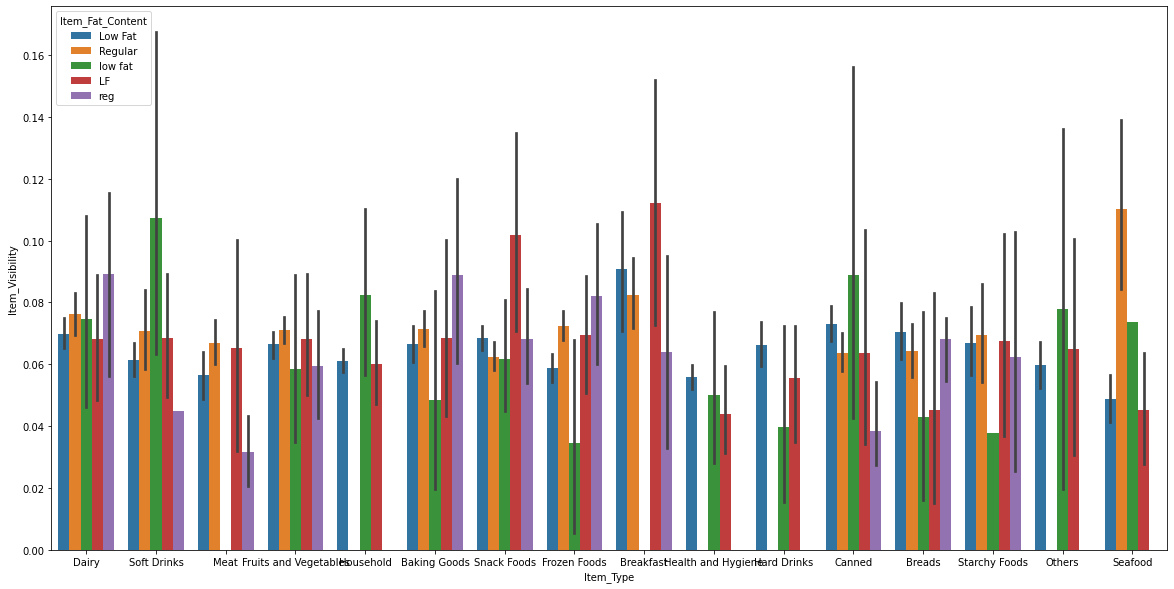

In [87]:
fig=plt.figure(figsize=(20,10))
sns.barplot(train_data['Item_Type'],train_data['Item_Visibility'],hue=train_data['Item_Fat_Content'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

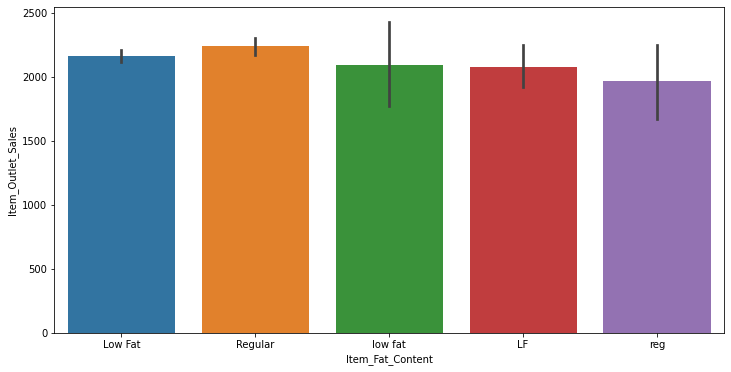

In [71]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Item_Fat_Content'],train_data['Item_Outlet_Sales'])

<Figure size 576x432 with 0 Axes>

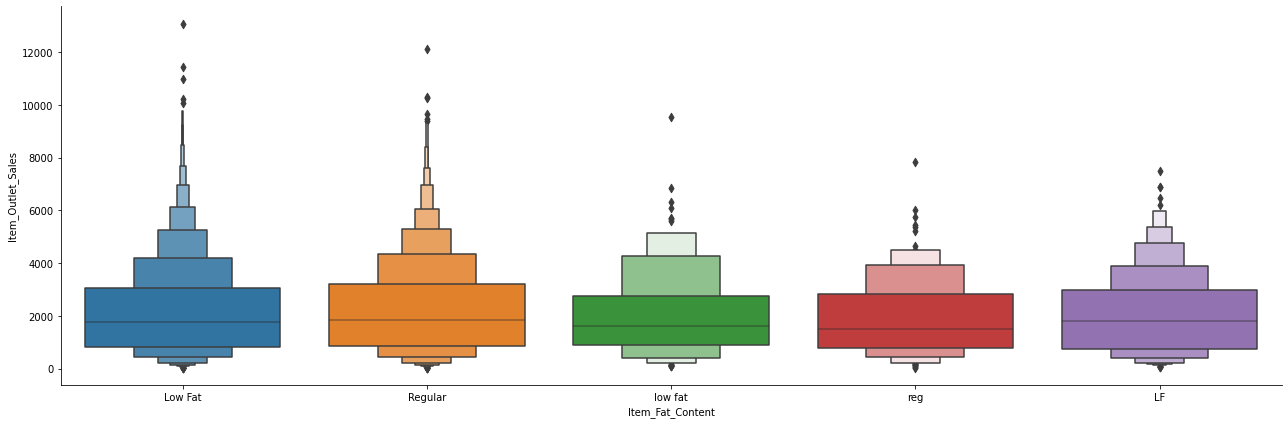

In [103]:
plt.figure(figsize=(8, 6))
sns.catplot(y='Item_Outlet_Sales',x='Item_Fat_Content',data= train_data.sort_values('Item_Outlet_Sales',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

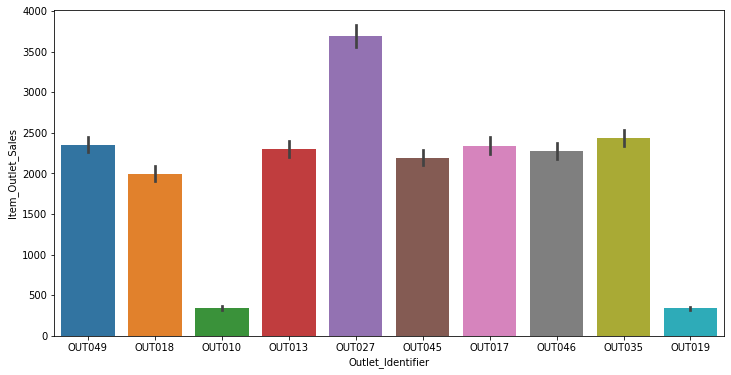

In [72]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Outlet_Identifier'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

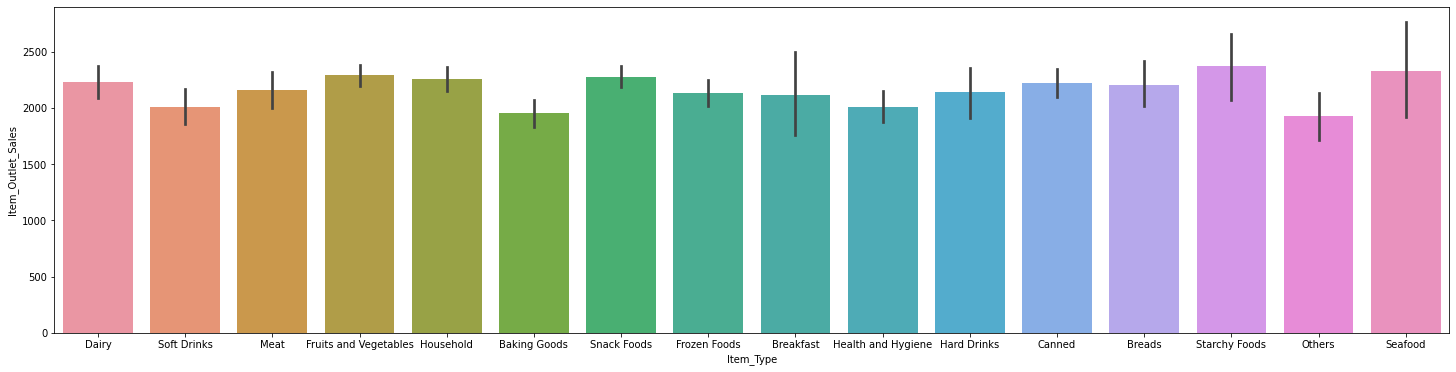

In [81]:
fig=plt.figure(figsize=(25,6))
sns.barplot(train_data['Item_Type'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

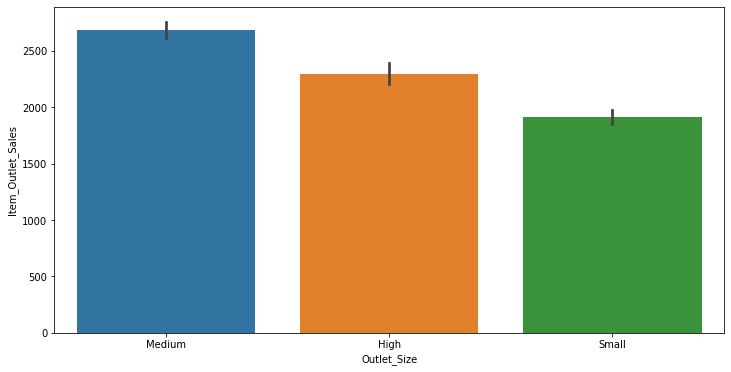

In [82]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Outlet_Size'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

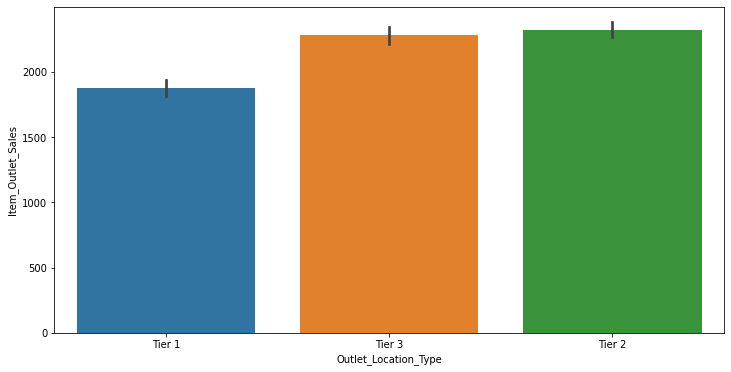

In [83]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Outlet_Location_Type'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

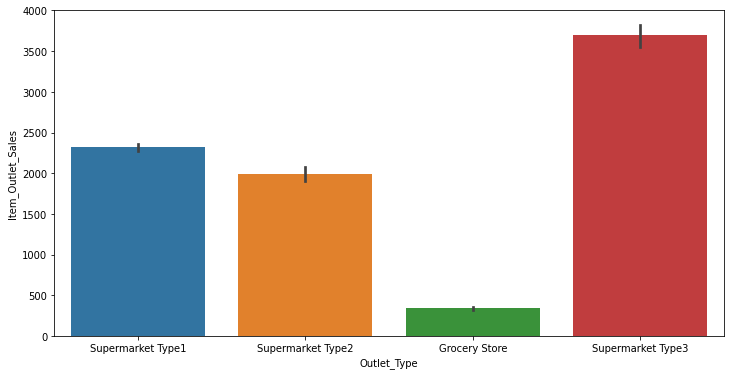

In [84]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Outlet_Type'],train_data['Item_Outlet_Sales'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Visibility'>

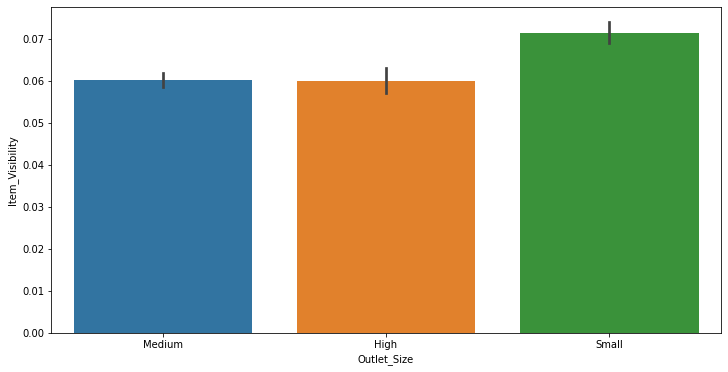

In [107]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Outlet_Size'],train_data['Item_Visibility'])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

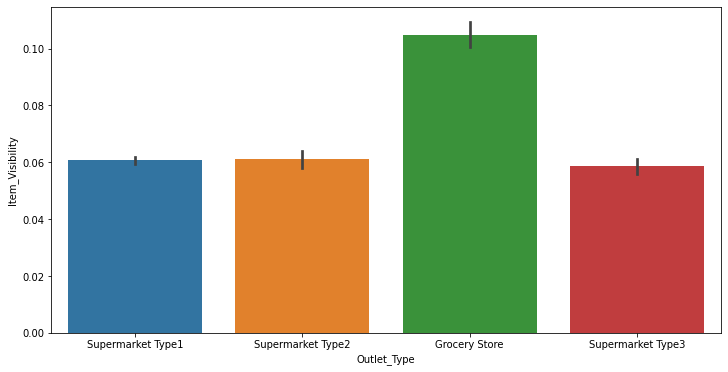

In [108]:
fig=plt.figure(figsize=(12,6))
sns.barplot(train_data['Outlet_Size'],train_data['Item_Visibility'])

# box plot(numerical -categorical)

In [88]:
temp_numerical_data.columns,temp_category_data.columns


(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

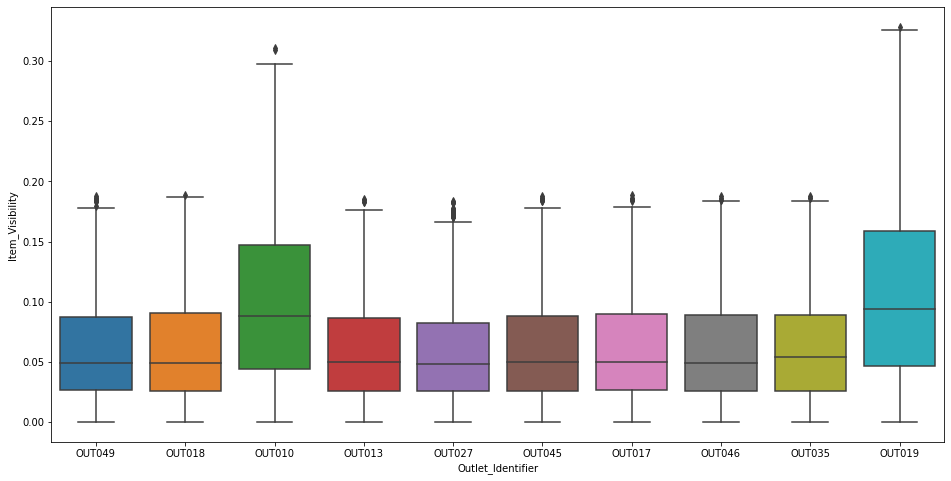

In [96]:
fig=plt.figure(figsize=(16,8))
sns.boxplot(train_data['Outlet_Identifier'], train_data["Item_Visibility"])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

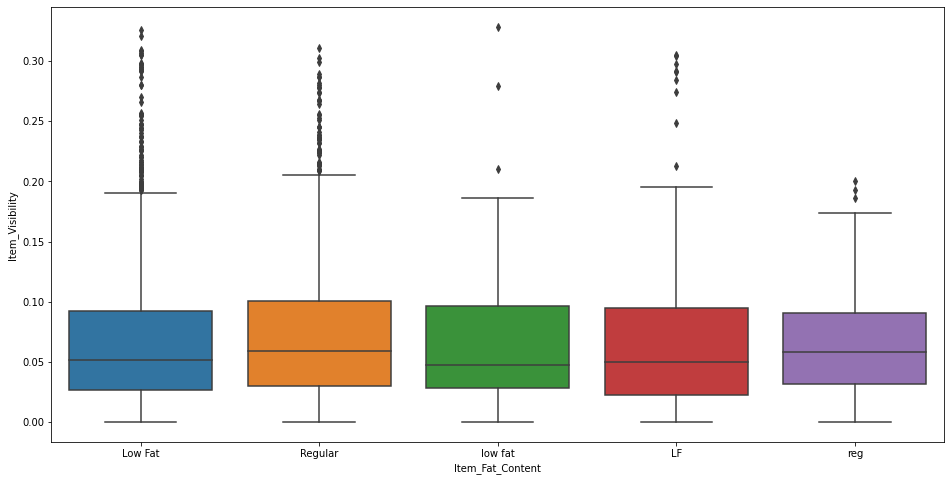

In [97]:
fig=plt.figure(figsize=(16,8))
sns.boxplot(train_data['Item_Fat_Content'], train_data["Item_Visibility"])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Visibility'>

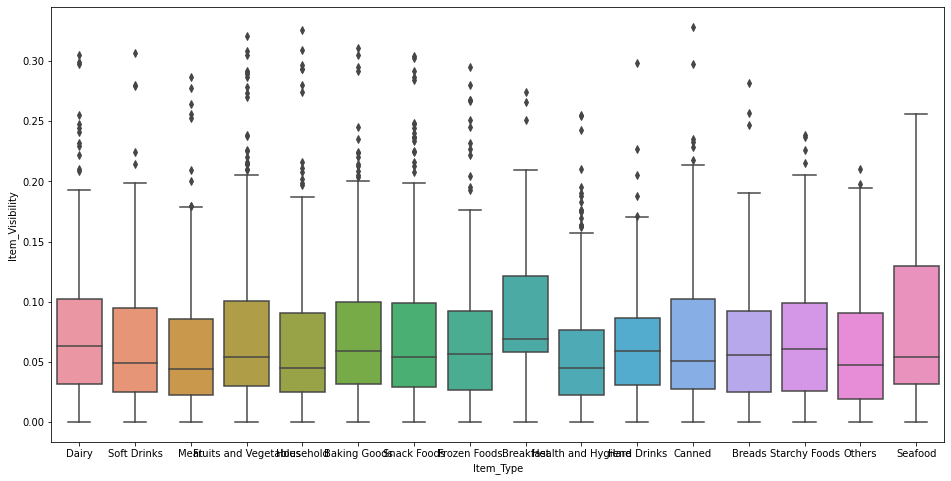

In [98]:
fig=plt.figure(figsize=(16,8))
sns.boxplot(train_data['Item_Type'], train_data["Item_Visibility"])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Visibility'>

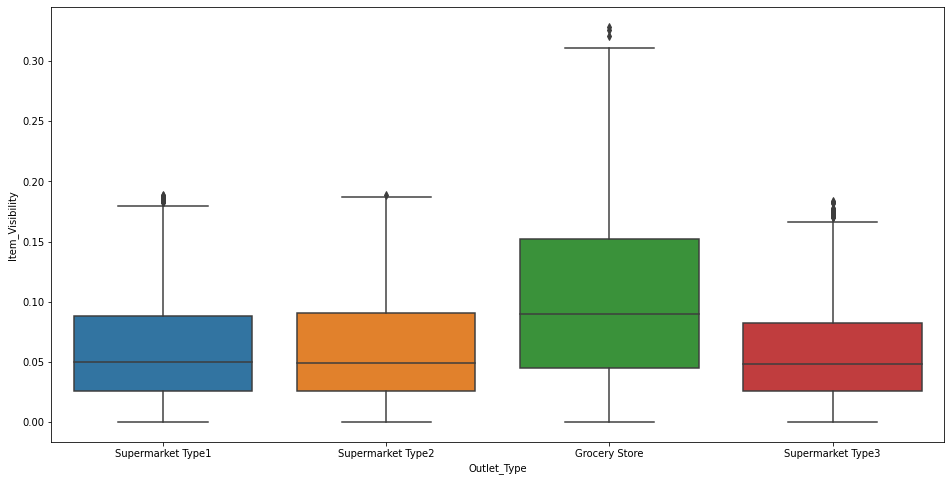

In [95]:
fig=plt.figure(figsize=(16,8))
sns.boxplot(train_data['Outlet_Type'], train_data["Item_Visibility"])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Visibility'>

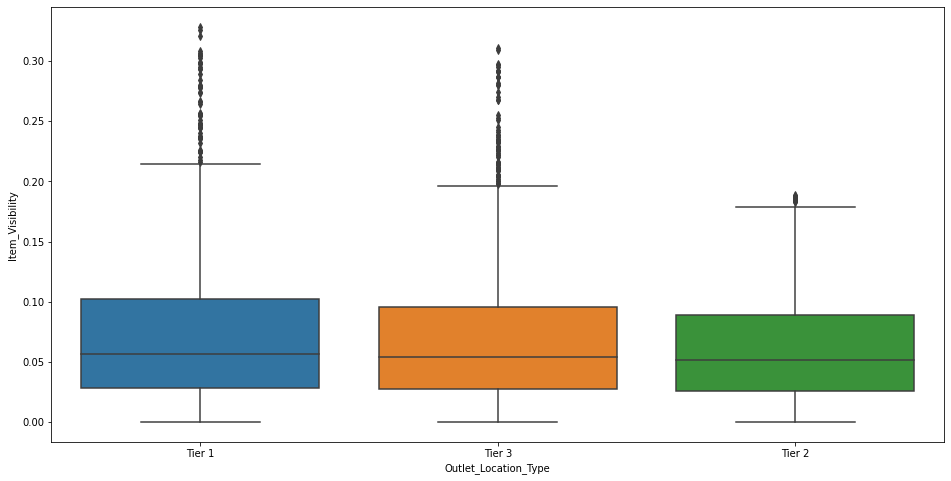

In [94]:
fig=plt.figure(figsize=(16,8))
sns.boxplot(train_data['Outlet_Location_Type'], train_data["Item_Visibility"])
